In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from pathlib import Path

from numpy import interp
from scipy.optimize import curve_fit
import PyMieScatt as ps

from infra import *
from functions import *

In [2]:
silicate_dust = pd.read_csv('files/silicate_dust.csv')
carbon_dust = pd.read_csv('files/carbon_dust.csv')
ice_dust = pd.read_csv('files/ice_dust.csv')

# Графики n и k

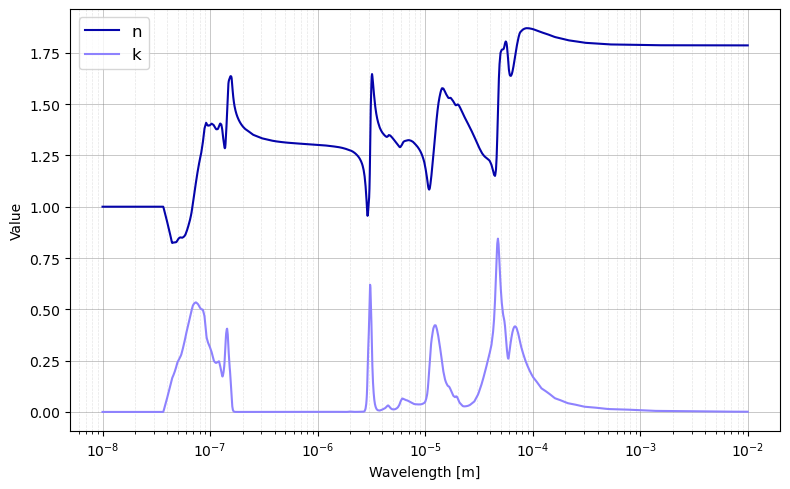

In [63]:
dust_nk = pd.read_csv('files/ice_dust.csv')

fig = plt.figure(figsize=[8, 5], layout='tight')

wl_metr = 10.0 ** np.arange(start=-8, stop=-2, step=0.003)
waves = dust_nk['wavelenght'].to_numpy()
n_array = dust_nk['n'].to_numpy()
k_array = dust_nk['k'].to_numpy()

interp_n = interp(wl_metr, waves, n_array)
interp_k = interp(wl_metr, waves, k_array)

plt.plot(wl_metr, interp_n, c='xkcd:royal blue', label='n')
plt.plot(wl_metr, interp_k, c='xkcd:periwinkle', label='k')

plt.xscale('log')
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

plt.xlabel('Wavelength [m]')
plt.ylabel('Value')
plt.legend(fontsize='large')

fig.savefig('plots/ice_1.pdf')

# Q_pr

/home/denis/Desktop/labs_2024/lab_2/functions.py:52: RuntimeWarning: overflow encountered in exp
  intensity = 1 / ( (wl**5) * (np.exp(pwr) - 1.0) )


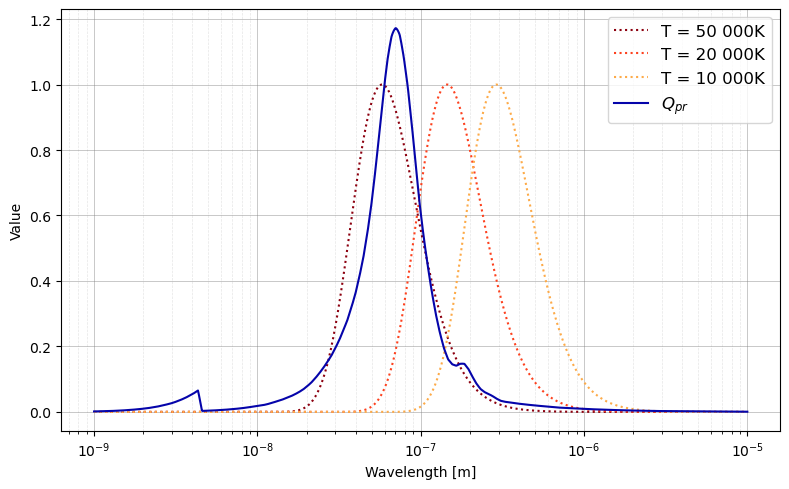

In [79]:
dust = pd.read_csv('files/carbon_dust.csv')

fig = plt.figure(figsize=[8, 5], layout='tight')

wl_metr = 10.0 ** np.arange(start=-9, stop=-5, step=0.003)
q_pr = vectorized_Qpr(dust, wl_metr, 100)

plt.plot(wl_metr, planck_shorten(wl_metr, 50000), 
         c='xkcd:crimson', ls=':', label='T = 50 000K')
plt.plot(wl_metr, planck_shorten(wl_metr, 20000),
         c='xkcd:orange red', ls=':', label='T = 20 000K')
plt.plot(wl_metr, planck_shorten(wl_metr, 10000),
         c='xkcd:light orange', ls=':', label='T = 10 000K')

plt.plot(wl_metr, q_pr, c='xkcd:royal blue', label='$Q_{pr}$')

plt.xscale('log')
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

plt.xlabel('Wavelength [m]')
plt.ylabel('Value')
plt.legend(fontsize='large')

fig.savefig('plots/carbon_2.pdf')

# Q_pr_integr for all 

/home/denis/Desktop/labs_2024/lab_2/functions.py:52: RuntimeWarning: overflow encountered in exp
  intensity = 1 / ( (wl**5) * (np.exp(pwr) - 1.0) )


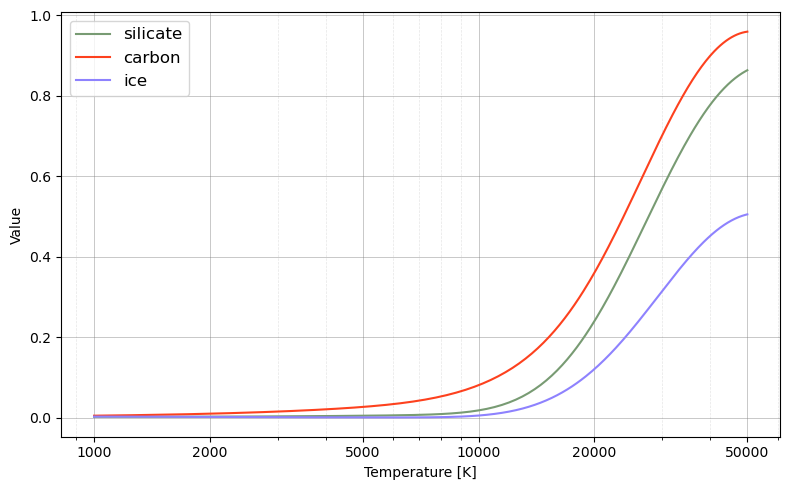

In [94]:
fig = plt.figure(figsize=[8, 5], layout='tight')

temperatures = np.arange(start=1000, stop=50001, step=250)
diameter = 200

q_pr_c = vectorized_Qpr_tilda(carbon_dust, diameter, temperatures)
q_pr_i = vectorized_Qpr_tilda(ice_dust, diameter, temperatures)
q_pr_s = vectorized_Qpr_tilda(silicate_dust, diameter, temperatures)

plt.plot(temperatures, q_pr_s, c='xkcd:grey green', label='silicate')
plt.plot(temperatures, q_pr_c, c='xkcd:orange red', label='carbon')
plt.plot(temperatures, q_pr_i, c='xkcd:periwinkle', label='ice')

plt.xscale('log')
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

fig.gca().set_xticks([1000, 2000, 5000, 10000, 20000, 50000])
fig.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlabel('Temperature [K]')
plt.ylabel('Value')
plt.legend(fontsize='large')

fig.savefig('plots/q_pr_for_all.pdf')

# Q_pr approximation

/home/denis/Desktop/labs_2024/lab_2/functions.py:52: RuntimeWarning: overflow encountered in exp
  intensity = 1 / ( (wl**5) * (np.exp(pwr) - 1.0) )


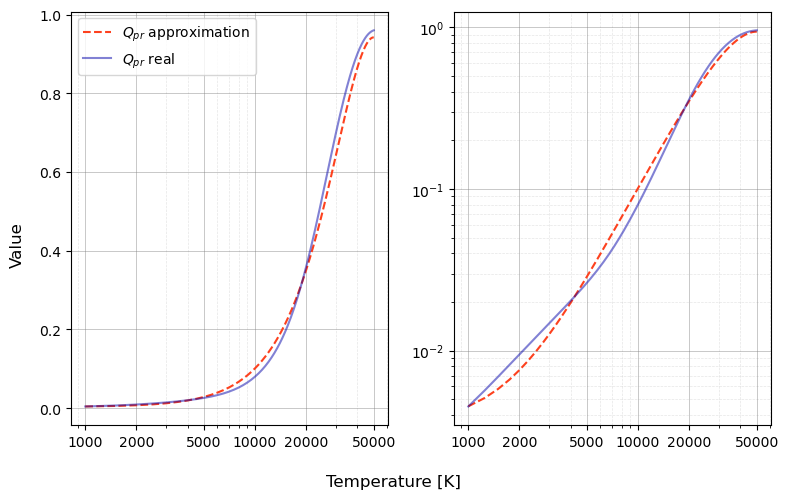

In [124]:
fig, axes = plt.subplots(1, 2, figsize=[8, 5], layout='tight')

temperatures = np.arange(start=1000, stop=50001, step=250)
diameter = 200

q_pr = vectorized_Qpr_tilda(carbon_dust, diameter, temperatures)

approx = lambda x: 3.5e-3 + (x)**2 / 9.8e8 * np.exp(- x**2 / 2.5e9)

for ax in axes:
    ax.plot(temperatures, approx(temperatures),
                c='xkcd:orange red', ls='--', label='$Q_{pr}$ approximation')
    ax.plot(temperatures, q_pr,
                c='xkcd:royal blue', alpha=0.5, label='$Q_{pr}$ real')
    ax.set_xscale('log')
    ax.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
    ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)
    ax.set_xticks([1000, 2000, 5000, 10000, 20000, 50000])
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

axes[0].legend()
axes[1].set_yscale('log')

fig.supylabel('Value')
fig.supxlabel('Temperature [K]')

fig.savefig('plots/approximation.pdf')

# Q_pr by T for all

In [145]:
temperatures = 10**np.arange(start=3, stop=4.75, step=0.05)
diameters = np.array([100, 200, 500, 1000, 2000])
q_pr_list = list()

for diam in diameters:
    q_pr_list.append(vectorized_Qpr_tilda(silicate_dust, diam, temperatures))

/home/denis/Desktop/labs_2024/lab_2/functions.py:52: RuntimeWarning: overflow encountered in exp
  intensity = 1 / ( (wl**5) * (np.exp(pwr) - 1.0) )


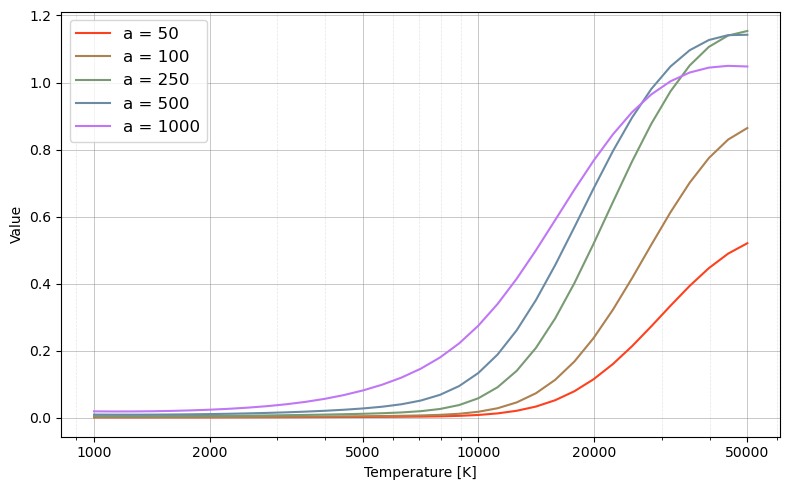

In [146]:
fig = plt.figure(figsize=[8, 5], layout='tight')
colors = ['xkcd:orange red', 'xkcd:light brown', 'xkcd:grey green', 'xkcd:grey blue', 'xkcd:light purple']

for i in range(5):
    plt.plot(temperatures, q_pr_list[i], c=colors[i], label=f'a = {int(diameters[i]/2)}')

plt.xscale('log')
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

fig.gca().set_xticks([1000, 2000, 5000, 10000, 20000, 50000])
fig.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlabel('Temperature [K]')
plt.ylabel('Value')
plt.legend(fontsize='large')

fig.savefig('plots/silicate_3.pdf')

# By star types

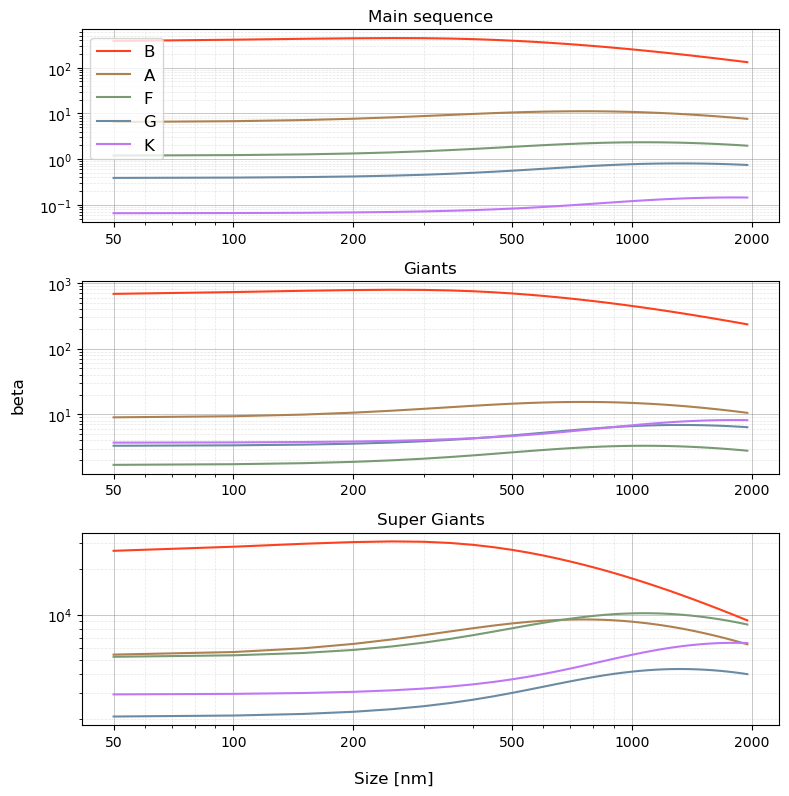

In [24]:
dust = pd.read_csv('files/silicate_dust.csv')
rho = 3.4

fig, axes = plt.subplots(3, 1, figsize=[8, 8], layout='tight')

luminiocity_types = ['B', 'A', 'F', 'G', 'K']
sequences = ['M', 'G', 'S']
a = np.arange(50, 2000, 50)

colors = ['xkcd:orange red', 'xkcd:light brown', 'xkcd:grey green', 'xkcd:grey blue', 'xkcd:light purple']

axes[0].set_title('Main sequence')
for lt, col in zip(luminiocity_types, colors):
    axes[0].plot(a, beta(carbon_dust, stars_TRM('M', lt), a, rho), c=col, label=lt)
axes[0].legend(fontsize='large')

axes[1].set_title('Giants')
for lt, col in zip(luminiocity_types, colors):
    axes[1].plot(a, beta(carbon_dust, stars_TRM('G', lt), a, rho), c=col, label=lt)

axes[2].set_title('Super Giants')
for lt, col in zip(luminiocity_types, colors):
    axes[2].plot(a, beta(carbon_dust, stars_TRM('S', lt), a, rho), c=col, label=lt)

for ax in axes:
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    ax.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.6)
    ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

    ax.set_xticks([50, 100, 200, 500, 1000, 2000])
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.supylabel('beta')
fig.supxlabel('Size [nm]')

fig.savefig('plots/silicate_4.pdf')